## Plots for poster

In [14]:
import pandas as pd
from pprint import pprint

v1_v3_eval = pd.read_csv("data/v1_v3_evaluation_result.csv")
v1_v4_eval = pd.read_csv("data/v1_v4_evaluation_result.csv")
v2_v3_eval = pd.read_csv("data/v2_v3_evaluation_result.csv")
v2_v4_eval = pd.read_csv("data/v2_v4_evaluation_result.csv")

v1_v3_mean_eval = pd.read_json("data/v1_v3_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v1_v3_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v1_v3_mean_eval.index = v1_v3_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v1_v4_mean_eval = pd.read_json("data/v1_v4_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v1_v4_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v1_v4_mean_eval.index = v1_v4_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v2_v3_mean_eval = pd.read_json("data/v2_v3_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v2_v3_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v2_v3_mean_eval.index = v2_v3_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v2_v4_mean_eval = pd.read_json("data/v2_v4_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v2_v4_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v2_v4_mean_eval.index = v2_v4_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

# Combine all evaluations into a single DataFrame
combined_eval = pd.DataFrame({
    'v1_v3': v1_v3_mean_eval,
    'v1_v4': v1_v4_mean_eval,
    'v2_v3': v2_v3_mean_eval,
    'v2_v4': v2_v4_mean_eval
})


,similarity_score,comprehensiveness_score,groundedness_score,company_list,category
0,1.0,0.875000,0.0,"{'ergo_', 'huk-coburg_', 'axa_', 'barmenia_json'}",Risikolebensversicherung
1,0.8,0.333333,1.0,"{'generali_', 'huk-coburg_', 'arag_', 'barmeni...",Rentenversicherung
2,1.0,0.733333,0.0,"{'generali_', 'huk-coburg_', 'barmenia_json', ...",Berufsunfähigkeitsversicherung
3,0.8,0.008333,0.0,"{'generali_', 'huk-coburg_', 'sdk_', 'arag_', ...",Krankenversicherung
4,0.8,0.466667,0.5,"{'ergo_', 'huk-coburg_', 'axa_', 'barmenia_json'}",Grundfähigkeitsversicherung


In [226]:
combined_eval

,v1_v3,v1_v4,v2_v3,v2_v4
mean_groundtruth_agreement,0.908333,0.921739,0.933333,0.954167
mean_comprehensiveness,0.628776,0.531832,0.713469,0.528214
mean_groundedness,0.400477,0.544918,0.653353,0.594822


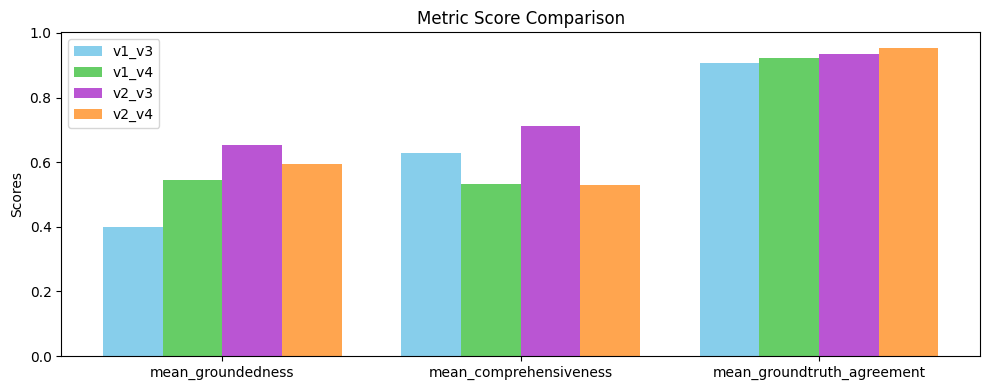

In [5]:
import matplotlib.pyplot as plt

# Create a single figure and axis with a smaller size
fig, ax = plt.subplots(figsize=(10, 4))

# Reorder the indices to start with 'groundedness'
reordered_indices = ['mean_groundedness', 'mean_comprehensiveness', 'mean_groundtruth_agreement']

# Plot all evaluations on the same bar chart with reordered indices using slightly darker colors
ax.bar(range(len(reordered_indices)), v1_v3_mean_eval[reordered_indices], width=0.2, label='v1_v3', align='center', color=(135/255, 206/255, 235/255))  # Slightly darker blue
ax.bar([x + 0.2 for x in range(len(reordered_indices))], v1_v4_mean_eval[reordered_indices], width=0.2, label='v1_v4', align='center', color=(102/255, 205/255, 102/255))  # Slightly darker green
ax.bar([x + 0.4 for x in range(len(reordered_indices))], v2_v3_mean_eval[reordered_indices], width=0.2, label='v2_v3', align='center', color=(186/255, 85/255, 211/255))  # Slightly darker purple
ax.bar([x + 0.6 for x in range(len(reordered_indices))], v2_v4_mean_eval[reordered_indices], width=0.2, label='v2_v4', align='center', color=(255/255, 165/255, 79/255))  # Slightly darker orange

# Set titles and labels
ax.set_title('Metric Score Comparison')
# ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_xticks([x + 0.3 for x in range(len(reordered_indices))])
ax.set_xticklabels(reordered_indices)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



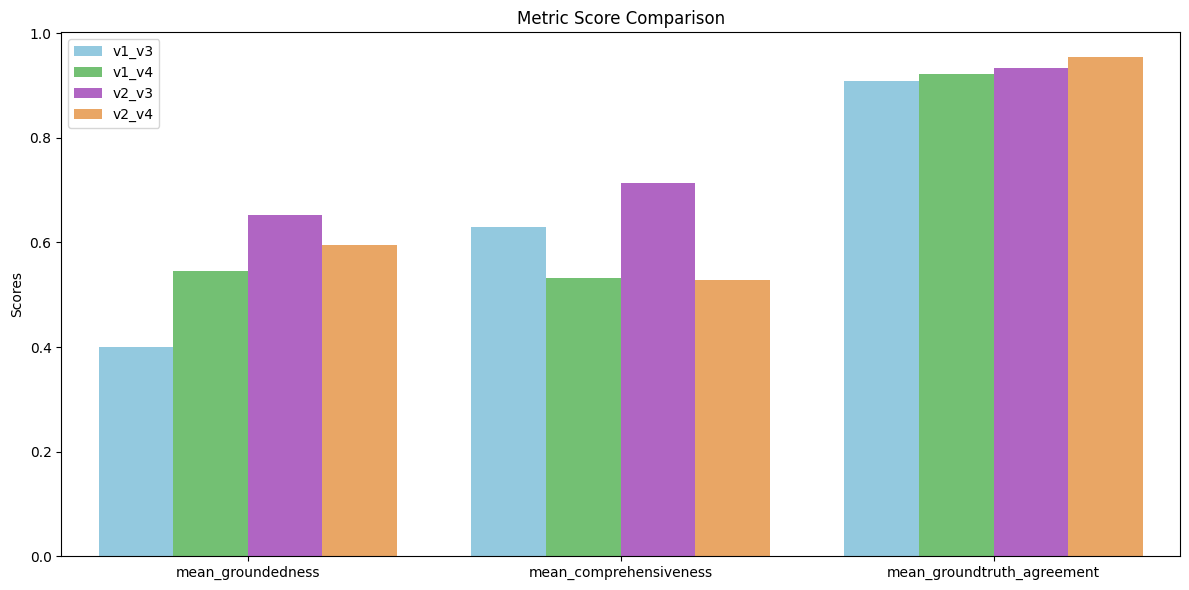

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorder the indices to start with 'groundedness'
reordered_indices = ['mean_groundedness', 'mean_comprehensiveness', 'mean_groundtruth_agreement']

# Create a DataFrame for seaborn
data = {
    'Metric': reordered_indices * 4,
    'Score': list(v1_v3_mean_eval[reordered_indices]) + list(v1_v4_mean_eval[reordered_indices]) + 
             list(v2_v3_mean_eval[reordered_indices]) + list(v2_v4_mean_eval[reordered_indices]),
    'Version': ['v1_v3'] * len(reordered_indices) + ['v1_v4'] * len(reordered_indices) + 
               ['v2_v3'] * len(reordered_indices) + ['v2_v4'] * len(reordered_indices)
}

# Create a seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Version', data=data, palette=['#87CEEB', '#66CD66', '#BA55D3', '#FFA54F'])

# Update layout
plt.title('Metric Score Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


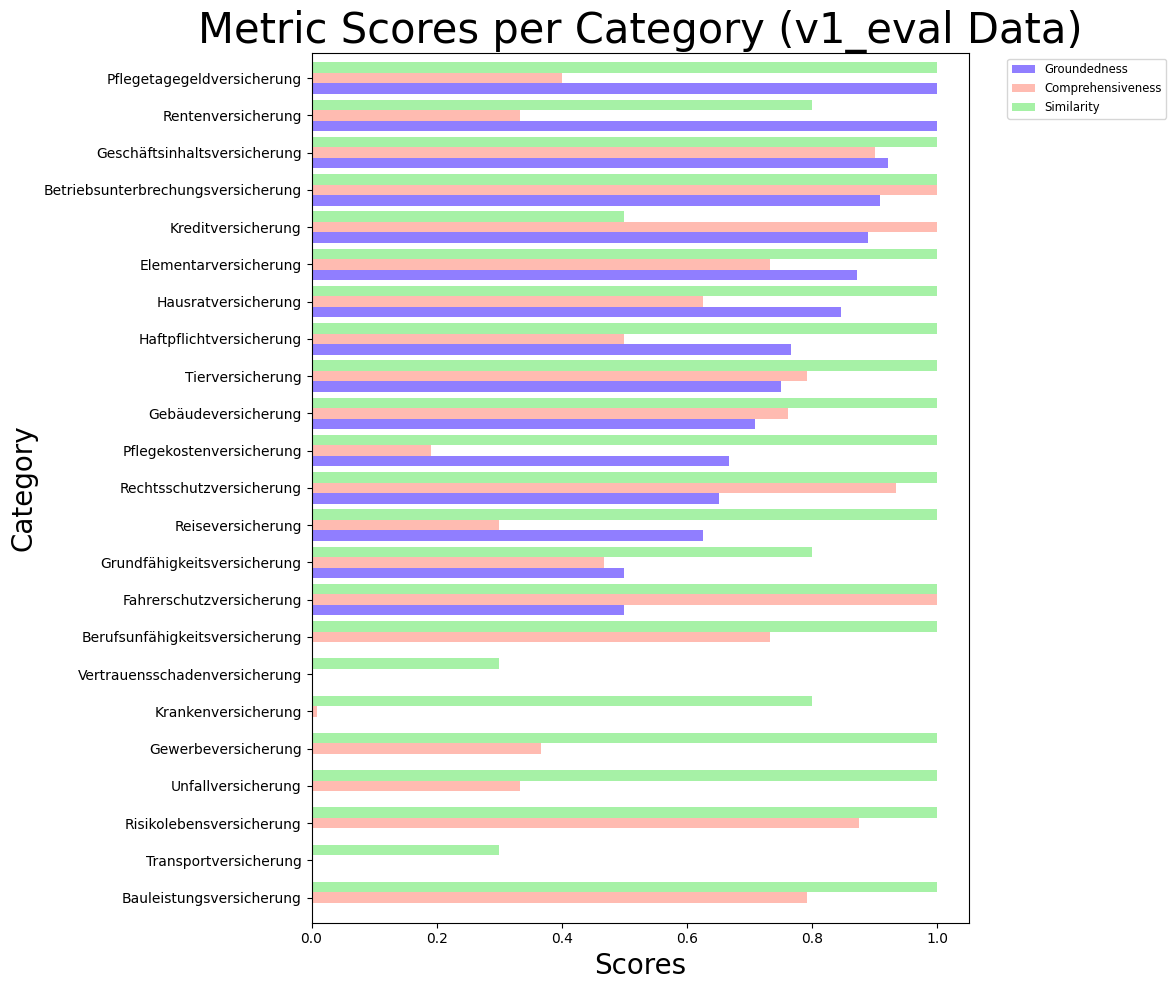

In [123]:
import matplotlib.pyplot as plt

# Calculate mean values for the v1_eval data and drop NaN values
v1_eval_mean = v1_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna()

# Sort the data by groundedness_score in descending order
v1_eval_mean_sorted = v1_eval_mean.sort_values(by='groundedness_score', ascending=True)

# Plot the data with categories on the y-axis
fig, ax = plt.subplots(figsize=(12, 10))

v1_eval_mean_sorted.plot(kind='barh', ax=ax, width=0.85, color=[(70/255, 40/255, 255/255, 0.6),     # 파랑색
                                                                (255/255, 120/255, 100/255, 0.5), # 빨강이랑 핑크 사이색깔
                                                                (144/255, 238/255, 144/255, 0.8)]) # 연한 초록색
ax.set_xlabel('Scores', fontsize=20)  # Increased font size for 'Scores'
ax.set_ylabel('Category', fontsize=20)  # Increased font size for 'Category'
ax.legend(['Groundedness', 'Comprehensiveness', 'Similarity'], loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1))
ax.yaxis.set_tick_params(rotation=0)

# Set a title for the plot
plt.title('Metric Scores per Category (v1_eval Data)', fontsize=30)

plt.tight_layout()
plt.show()


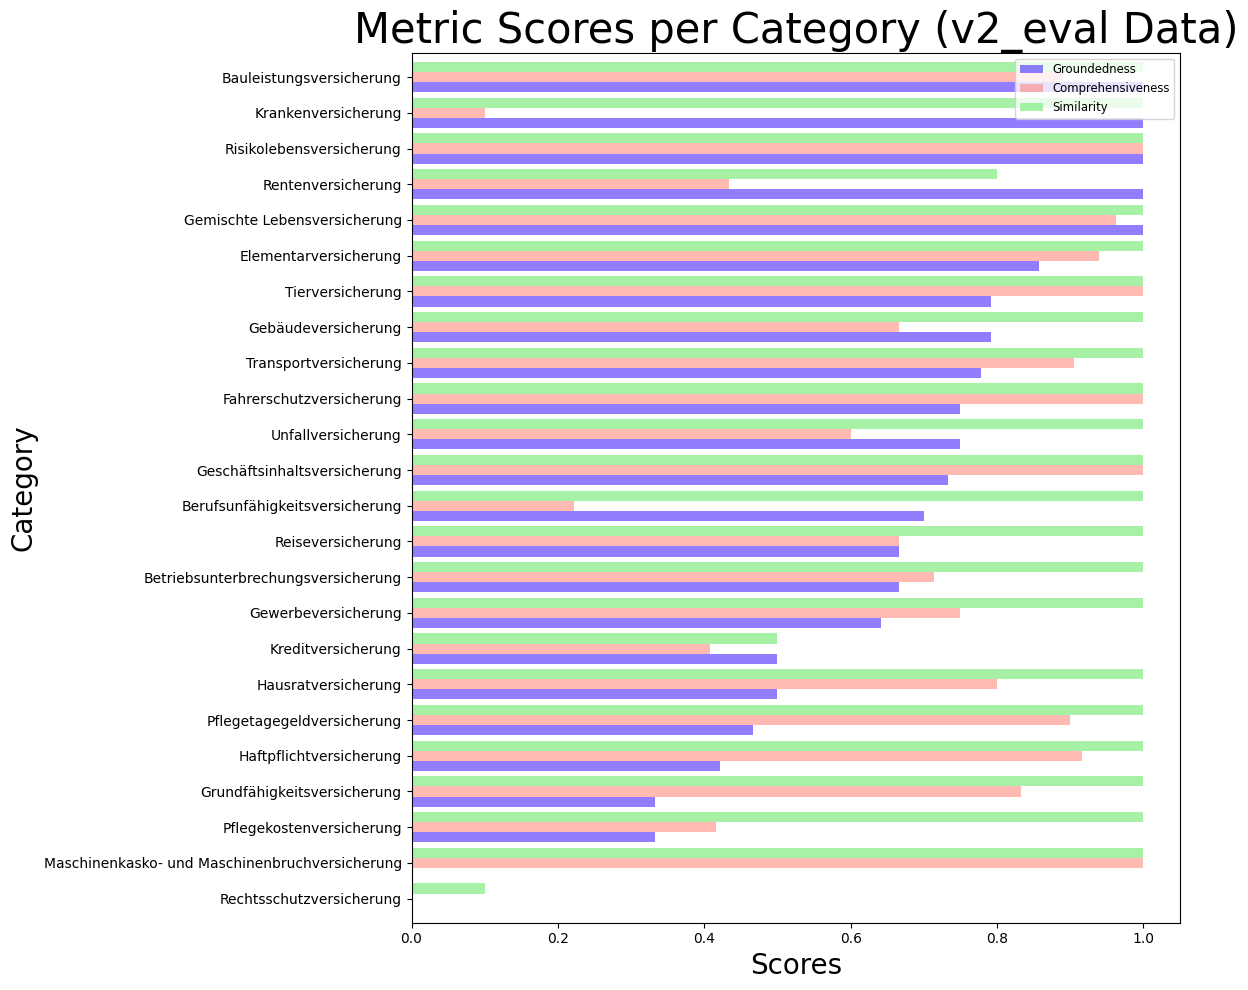

In [124]:
import matplotlib.pyplot as plt

# Calculate mean values for the v2_eval data and drop NaN values
v2_eval_mean = v2_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna()

# Sort the data by groundedness_score in descending order
v2_eval_mean_sorted = v2_eval_mean.sort_values(by='groundedness_score', ascending=True)

# Plot the data with categories on the y-axis
fig, ax = plt.subplots(figsize=(12, 10))

v2_eval_mean_sorted.plot(kind='barh', ax=ax, width=0.85, color=[(70/255, 40/255, 255/255, 0.6),     # 파랑색
                                                                (255/255, 120/255, 100/255, 0.5), # 빨강이랑 핑크 사이색깔
                                                                (144/255, 238/255, 144/255, 0.8)]) # 연한 초록색
ax.set_xlabel('Scores', fontsize=20)  # Increased font size for 'Scores'
ax.set_ylabel('Category', fontsize=20)  # Increased font size for 'Category'
ax.legend(['Groundedness', 'Comprehensiveness', 'Similarity'], loc='upper right', fontsize='small')
ax.yaxis.set_tick_params(rotation=0)

# Set a title for the plot
plt.title('Metric Scores per Category (v2_eval Data)', fontsize=30)

plt.tight_layout()
plt.show()


# Dataset Overview ( company, product, category )
- Count the number of companies and products per category 

##### v1 -> basic prompt result 
##### v2 -> advanced prompt result 

In [59]:
v1_v3_comparison_table_for_evaluation = pd.read_csv("data/v1_v3_comparison_table_for_evaluation.csv")
v1_v4_comparison_table_for_evaluation = pd.read_csv("data/v1_v4_comparison_table_for_evaluation.csv")
v2_v3_comparison_table_for_evaluation = pd.read_csv("data/v2_v3_comparison_table_for_evaluation.csv")
v2_v4_comparison_table_for_evaluation = pd.read_csv("data/v2_v4_comparison_table_for_evaluation.csv")

In [93]:
v1_v3_comparison_table_for_evaluation

,company_names,product_names,category,company_details,comparison
0,"{'barmenia.json', 'huk-coburg.json', 'axa.json...",{'deu_bde_privat_bde_produkte_privat_bde_vorso...,Risikolebensversicherung,['Details von axa.json:\nSchutz für Ihre Liebe...,Hier ist eine Vergleichstabelle im Markdown-Fo...
1,"{'barmenia.json', 'ergo.json', 'arag.json', 'h...",{'de_Produkte_Rentenversicherung_Zukunfts-Rent...,Rentenversicherung,['Details von arag.json:\nMonatliche Rente zur...,Hier ist eine Vergleichstabelle im Markdown-Fo...
2,"{'barmenia.json', 'ergo.json', 'huk-coburg.jso...",{'deu_bde_privat_bde_produkte_privat_bde_vorso...,Berufsunfähigkeitsversicherung,['Details von axa.json:\nEinkommen absichern: ...,Hier ist eine Vergleichstabelle im Markdown-Fo...
3,"{'sdk.json', 'barmenia.json', 'ergo.json', 'ar...",{'deu_bde_privat_bde_produkte_privat_bde_gesun...,Krankenversicherung,['Details von arag.json:\n4 Tarife zur Wahl fü...,Hier ist eine Vergleichstabelle im Markdown-Fo...
4,"{'barmenia.json', 'huk-coburg.json', 'axa.json...",{'deu_bde_privat_bde_produkte_privat_bde_vorso...,Grundfähigkeitsversicherung,['Details von axa.json:\nAbsicherung gegen fin...,Hier ist eine Vergleichstabelle im Markdown-Fo...
5,"{'arag.json', 'huk-coburg.json', 'barmenia.jso...","{'produkte-pflegeschutzpaket.md.md', 'gesundhe...",Pflegekostenversicherung,['Details von arag.json:\nKostenschutz für all...,Hier ist eine Vergleichstabelle im Markdown-Fo...
6,"{'sdk.json', 'barmenia.json', 'huk-coburg.json...",{'deu_bde_privat_bde_produkte_privat_bde_gesun...,Pflegetagegeldversicherung,['Details von axa.json:\nBis zu 1.900€ Pflegeg...,Hier ist eine Vergleichstabelle im Markdown-Fo...
7,"{'barmenia.json', 'ergo.json', 'arag.json', 'h...","{'geschaeftskunden_luftfahrtversicherung.md', ...",Haftpflichtversicherung,['Details von arag.json:\nKombination aus Rech...,Hier ist eine Vergleichstabelle im Markdown-Fo...
8,"{'axa.json', 'generali.json'}",{'geschaeftskunden_betriebsschliessungsversich...,Betriebsunterbrechungsversicherung,['Details von axa.json:\nSchutz vor wirtschaft...,Hier ist eine Vergleichstabelle im Markdown-Fo...
9,"{'barmenia.json', 'ergo.json', 'arag.json', 'h...","{'pk_haus-wohnung_p_hausratversicherung.md', '...",Hausratversicherung,['Details von arag.json:\nUmfassender Schutz g...,Hier ist eine Vergleichstabelle im Markdown-Fo...


In [86]:
v1_v3_company_set = set()
v1_v3_product_set = set()
for idx, row in v1_v3_comparison_table_for_evaluation.iterrows():
    v1_v3_company_set.update(ast.literal_eval(row['company_names']))
    v1_v3_product_set.update(ast.literal_eval(row['product_names']))

print('v1_v3 company count : ', len(v1_v3_company_set)a)
print('v1_v3 product count : ', len(v1_v3_product_set))
print('v1_v3 category count : ', len(v1_v3_comparison_table_for_evaluation))

v1_v3 company count :  8
v1_v3 product count :  532
v1_v3 category count :  23


In [96]:
# v2_v3_company_set = set()
# v2_v3_product_set = set()
# for idx, row in v2_v3_comparison_table_for_evaluation.iterrows():
#     v2_v3_company_set.update(ast.literal_eval(row['company_names']))
#     v2_v3_product_set.update(ast.literal_eval(row['product_names']))

# print('v2_v3 company count : ', len(v2_v3_company_set))
# print('v2_v3 product count : ', len(v2_v3_product_set))
# print('v2_v3 category count : ', len(v2_v3_comparison_table_for_evaluation))

In [94]:
v2_v3_company_set

{'report_full_details_v2_arag_classified.json',
 'report_full_details_v2_axa_classified.json',
 'report_full_details_v2_barmenia_classified.json',
 'report_full_details_v2_dkv_classified.json',
 'report_full_details_v2_ergo_classified.json',
 'report_full_details_v2_generali_classified.json',
 'report_full_details_v2_huk-coburg_classified.json',
 'report_full_details_v2_r+v_classified.json',
 'report_full_details_v2_sdk_classified.json',
 'report_full_details_v2_signal_iduna_group_classified.json'}

In [88]:
v1_v4_company_set = set()
v1_v4_product_set = set()
for idx, row in v1_v4_comparison_table_for_evaluation.iterrows():
    v1_v4_company_set.update(ast.literal_eval(row['company_names']))
    v1_v4_product_set.update(ast.literal_eval(row['product_names']))

print('v1_v4 company count : ', len(v1_v4_company_set))
print('v1_v4 product count : ', len(v1_v4_product_set))
print('v1_v4 category count : ', len(v1_v4_comparison_table_for_evaluation))

v1_v4 company count :  8
v1_v4 product count :  532
v1_v4 category count :  23


In [95]:
v1_v4_company_set

{'arag.json',
 'axa.json',
 'barmenia.json',
 'dkv.json',
 'ergo.json',
 'generali.json',
 'huk-coburg.json',
 'sdk.json'}

In [89]:
v2_v4_company_set = set()
v2_v4_product_set = set()
for idx, row in v2_v4_comparison_table_for_evaluation.iterrows():
    v2_v4_company_set.update(ast.literal_eval(row['company_names']))
    v2_v4_product_set.update(ast.literal_eval(row['product_names']))

print('v2_v4 company count : ', len(v2_v4_company_set))
print('v2_v4 product count : ', len(v2_v4_product_set))
print('v2_v4 category count : ', len(v2_v4_comparison_table_for_evaluation))

v2_v4 company count :  10
v2_v4 product count :  800
v2_v4 category count :  24


In [91]:
v2_v4_company_set

{'report_full_details_v2_arag_classified.json',
 'report_full_details_v2_axa_classified.json',
 'report_full_details_v2_barmenia_classified.json',
 'report_full_details_v2_dkv_classified.json',
 'report_full_details_v2_ergo_classified.json',
 'report_full_details_v2_generali_classified.json',
 'report_full_details_v2_huk-coburg_classified.json',
 'report_full_details_v2_r+v_classified.json',
 'report_full_details_v2_sdk_classified.json',
 'report_full_details_v2_signal_iduna_group_classified.json'}